In [1]:
import pygraphblas as grb
from pygraphblas.gviz import draw, draw_graph_op as draw_op
from pygraphblas.gviz import draw_cy

      0  1  2
  0|         |  0
  1|        4|  1
  2|         |  2
      0  1  2
        0   1   2
   0|   -   -   -|  0
   1|   -   -   4|  1
   2|   -   -   -|  2
        0   1   2
[(1, 2, 4)]


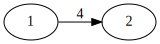

In [2]:
# Exercise 2: BuildMatrix.c

def BuildMatrix():
    NUM_NODES = 3
    graph = grb.Matrix.sparse(grb.UINT64, NUM_NODES, NUM_NODES)
    graph[1, 2] = 4

    print(graph)
    print(graph.to_string(width = 4, empty_char='   -'))
    print(list(graph))
    return graph
    
draw(BuildMatrix())

      0  1  2
  0|     2   |  0
  1|  2     4|  1
  2|     4   |  2
      0  1  2


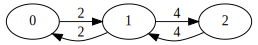

In [3]:
# Exercise 3: BuildAdjMatTuple.c

def BuildAdjMatTuple():
    NUM_NODES = 3
    graph = grb.Matrix.sparse(grb.UINT64, NUM_NODES, NUM_NODES)
    graph[1, 2] = 4
    graph[2, 1] = 4
    graph[0, 1] = 2
    graph[1, 0] = 2

    print(graph)
    return graph

draw(BuildAdjMatTuple())

      0  1  2  3  4  5  6
  0|     t     t         |  0
  1|              t     t|  1
  2|                 t   |  2
  3|  t     t            |  3
  4|                 t   |  4
  5|        t            |  5
  6|        t  t  t      |  6
      0  1  2  3  4  5  6


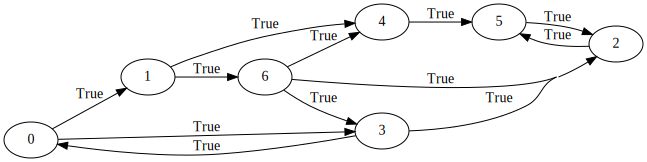

In [4]:
# Exercise 4: BuildAdjMatIndVec.c

def BuildAdjMatIndVec():
    NUM_NODES = 7
    row_indices = [0,0,1,1,2,3,3,4,5,6,6,6]
    col_indices = [1,3,4,6,5,0,2,5,2,2,3,4]

    NUM_EDGES = len(row_indices)
    values    = [True]*NUM_EDGES

    #graph = grb.Matrix.from_lists(row_indices, col_indices, values, NUM_NODES, NUM_NODES, grb.BOOL)
    graph = grb.Matrix.from_lists(row_indices, col_indices, values)

    print(graph)
    return graph

draw(BuildAdjMatIndVec())

In [5]:
# Exercise 5: matvec.c

def matvec():
    NUM_NODES = 7

    row_indices = [0,0,1,1,2,3,3,4,5,6,6,6]
    col_indices = [1,3,4,6,5,0,2,5,2,2,3,4]
    
    NUM_EDGES = len(row_indices)
    values    = [True]*NUM_EDGES
    #values      = [True, True, True, True, True, True, True, True, True, True, True, True]
    
    #graph = grb.Matrix.from_lists(row_indices, col_indices, values, NUM_NODES, NUM_NODES, grb.BOOL)
    graph = grb.Matrix.from_lists(row_indices, col_indices, values)
    
    NODE = 2
    vec = grb.Vector.sparse(grb.BOOL, NUM_NODES)
    vec[NODE] = True

    with grb.BOOL.LOR_LAND:
        #result = graph @ vec
        
        result = grb.Vector.sparse(grb.BOOL, NUM_NODES)
        graph.mxv(vec, out=result)
    
    print(graph)
    print(vec)
    return result

result = matvec()
print("\nresult:")
print(result)

      0  1  2  3  4  5  6
  0|     t     t         |  0
  1|              t     t|  1
  2|                 t   |  2
  3|  t     t            |  3
  4|                 t   |  4
  5|        t            |  5
  6|        t  t  t      |  6
      0  1  2  3  4  5  6
0|
1|
2| t
3|
4|
5|
6|

result:
0|
1|
2|
3| t
4|
5| t
6| t


In [6]:
# Exercise 6: matvecTrans.c

def matvecTrans():
    NUM_NODES = 7
    
    row_indices = [0,0,1,1,2,3,3,4,5,6,6,6]
    col_indices = [1,3,4,6,5,0,2,5,2,2,3,4]

    NUM_EDGES = len(row_indices)
    values    = [True]*NUM_EDGES
    #values      = [True, True, True, True, True, True, True, True, True, True, True, True]

    #graph = grb.Matrix.from_lists(row_indices, col_indices, values, NUM_NODES, NUM_NODES, grb.BOOL)
    graph = grb.Matrix.from_lists(row_indices, col_indices, values)
    
    NODE = 6
    vec = grb.Vector.sparse(grb.BOOL, NUM_NODES)
    vec[NODE] = True

    with grb.BOOL.LOR_LAND:
        # easy mode
        #result = graph.T @ vec
        
        # easy mode translated
        #tmp = graph.transpose()
        #result = tmp.mxv(vec)
        
        # "graphblas C mode"
        #result = grb.Vector(grb.BOOL, NUM_NODES)
        #graph.mxv(vec, out=result, desc=grb.descriptor.T0)
        
        # graphblas C + construct result
        result = graph.mxv(vec, desc=grb.descriptor.T0)
    
    print(graph)
    print(vec)
    return result


result = matvecTrans()
print("\nresult:")
print(result)

      0  1  2  3  4  5  6
  0|     t     t         |  0
  1|              t     t|  1
  2|                 t   |  2
  3|  t     t            |  3
  4|                 t   |  4
  5|        t            |  5
  6|        t  t  t      |  6
      0  1  2  3  4  5  6
0|
1|
2|
3|
4|
5|
6| t

result:
0|
1|
2| t
3| t
4| t
5|
6|


In [7]:
# Exercise 7 on working with different semirings was skipped

In [8]:
# Exercise 8: matvecTransIter.c  Iterative mxv to visit neighbors (fixed iteration)

def matvecTransIter():
    NUM_NODES = 7
    NUM_EDGES = 12
    row_indices = [0,0,1,1,2,3,3,4,5,6,6,6]
    col_indices = [1,3,4,6,5,0,2,5,2,2,3,4]
    values      = [True, True, True, True, True, True, True, True, True, True, True, True]
    #graph = grb.Matrix.sparse(grb.types.BOOL, NUM_NODES, NUM_NODES)
    graph = grb.Matrix.from_lists(row_indices, col_indices, values, NUM_NODES, NUM_NODES, grb.BOOL)
    print(graph)
    
    SRC_NODE = 0
    w = grb.Vector.sparse(grb.BOOL, NUM_NODES)
    w[SRC_NODE] = True
    print("\nInitial wavefront:")
    print(w)

    with grb.BOOL.LOR_LAND:
        for iter in range(NUM_NODES):
            w = graph.T @ w
            print("\nIteration", iter, "wavefront:")
            print(w)

matvecTransIter()

      0  1  2  3  4  5  6
  0|     t     t         |  0
  1|              t     t|  1
  2|                 t   |  2
  3|  t     t            |  3
  4|                 t   |  4
  5|        t            |  5
  6|        t  t  t      |  6
      0  1  2  3  4  5  6

Initial wavefront:
0| t
1|
2|
3|
4|
5|
6|

Iteration 0 wavefront:
0|
1| t
2|
3| t
4|
5|
6|

Iteration 1 wavefront:
0| t
1|
2| t
3|
4| t
5|
6| t

Iteration 2 wavefront:
0|
1| t
2| t
3| t
4| t
5| t
6|

Iteration 3 wavefront:
0| t
1|
2| t
3|
4| t
5| t
6| t

Iteration 4 wavefront:
0|
1| t
2| t
3| t
4| t
5| t
6|

Iteration 5 wavefront:
0| t
1|
2| t
3|
4| t
5| t
6| t

Iteration 6 wavefront:
0|
1| t
2| t
3| t
4| t
5| t
6|


In [9]:
# Exercise 9: matvecTransIterVisited.c  Iterative mxv to visit neighbors + build visited (fixed iteration)

def matvecTransIter():
    NUM_NODES = 7
    NUM_EDGES = 12
    row_indices = [0,0,1,1,2,3,3,4,5,6,6,6]
    col_indices = [1,3,4,6,5,0,2,5,2,2,3,4]
    values      = [True, True, True, True, True, True, True, True, True, True, True, True]
    #graph = grb.Matrix.sparse(grb.types.BOOL, NUM_NODES, NUM_NODES)
    graph = grb.Matrix.from_lists(row_indices, col_indices, values, NUM_NODES, NUM_NODES, grb.BOOL)
    print(graph)
    
    SRC_NODE = 0
    w = grb.Vector.sparse(grb.BOOL, NUM_NODES) #wavefront
    v = grb.Vector.sparse(grb.BOOL, NUM_NODES) #visited
    w[SRC_NODE] = True

    with grb.BOOL.LOR_LAND, grb.Accum(grb.BOOL.LOR):
        for iter in range(NUM_NODES):
            #v += w     # This uses LOR b/c LOR is default add for BOOL types
            #v = v + w
            v.eadd(w, add_op=grb.BOOL.LOR)
            #v[w] = True
            #v.assign_scalar(True, mask=w)
            
            print("\nIteration:", iter)
            print("visited:")
            print(v)
            w = graph.T @ w
            print("wavefront:")
            print(w)

matvecTransIter()

      0  1  2  3  4  5  6
  0|     t     t         |  0
  1|              t     t|  1
  2|                 t   |  2
  3|  t     t            |  3
  4|                 t   |  4
  5|        t            |  5
  6|        t  t  t      |  6
      0  1  2  3  4  5  6

Iteration: 0
visited:
0|
1|
2|
3|
4|
5|
6|
wavefront:
0|
1| t
2|
3| t
4|
5|
6|

Iteration: 1
visited:
0|
1|
2|
3|
4|
5|
6|
wavefront:
0| t
1|
2| t
3|
4| t
5|
6| t

Iteration: 2
visited:
0|
1|
2|
3|
4|
5|
6|
wavefront:
0|
1| t
2| t
3| t
4| t
5| t
6|

Iteration: 3
visited:
0|
1|
2|
3|
4|
5|
6|
wavefront:
0| t
1|
2| t
3|
4| t
5| t
6| t

Iteration: 4
visited:
0|
1|
2|
3|
4|
5|
6|
wavefront:
0|
1| t
2| t
3| t
4| t
5| t
6|

Iteration: 5
visited:
0|
1|
2|
3|
4|
5|
6|
wavefront:
0| t
1|
2| t
3|
4| t
5| t
6| t

Iteration: 6
visited:
0|
1|
2|
3|
4|
5|
6|
wavefront:
0|
1| t
2| t
3| t
4| t
5| t
6|


In [10]:
# Exercise 10: matvecTransIterVisitedExitFlag.c  Iterative mxv to visit neighbors + build visited (exit flag)

def matvecTransIterExitFlag():
    NUM_NODES = 7
    NUM_EDGES = 12
    row_indices = [0,0,1,1,2,3,3,4,5,6,6,6]
    col_indices = [1,3,4,6,5,0,2,5,2,2,3,4]
    values      = [True, True, True, True, True, True, True, True, True, True, True, True]
    #graph = grb.Matrix.sparse(grb.types.BOOL, NUM_NODES, NUM_NODES)
    graph = grb.Matrix.from_lists(row_indices, col_indices, values, NUM_NODES, NUM_NODES, grb.BOOL)
    print(graph)
    
    SRC_NODE = 0
    w = grb.Vector.sparse(grb.BOOL, NUM_NODES) #wavefront
    v = grb.Vector.sparse(grb.BOOL, NUM_NODES) #visited
    w[SRC_NODE] = True
    
    print("wavefront:")
    print(w)

    it = 1
    with grb.BOOL.LOR_LAND:
        while w.nvals > 0:
            print("\nIteration:", it)
            
            # Merge the wavefront into the visited list
            # TODO which is the idiom we want here?
            #v += w               # This uses LOR b/c LOR is default add for BOOL types
            #v = v + w
            #v.eadd(w, out=v, add_op=grb.BOOL.LOR)
            v[w] = True
            #v.assign_scalar(True, mask=w)

            print("visited:")
            print(v)
            
            # Compute the next wavefront
            # w<!v, r> = graph.T @ w
            graph.mxv(w, mask=v, out=w, desc=grb.descriptor.RCT0)
            
            # Compute the next wavefront without using a transpose
            # w'<!v', r> = w' @ graph
            #w.vxm(graph, mask=v, out=w, desc=grb.descriptor.RC)
            
            print("next wavefront:")
            print(w)
            
            it += 1

matvecTransIterExitFlag()

      0  1  2  3  4  5  6
  0|     t     t         |  0
  1|              t     t|  1
  2|                 t   |  2
  3|  t     t            |  3
  4|                 t   |  4
  5|        t            |  5
  6|        t  t  t      |  6
      0  1  2  3  4  5  6
wavefront:
0| t
1|
2|
3|
4|
5|
6|

Iteration: 1
visited:
0| t
1|
2|
3|
4|
5|
6|
next wavefront:
0|
1| t
2|
3| t
4|
5|
6|

Iteration: 2
visited:
0| t
1| t
2|
3| t
4|
5|
6|
next wavefront:
0|
1|
2| t
3|
4| t
5|
6| t

Iteration: 3
visited:
0| t
1| t
2| t
3| t
4| t
5|
6| t
next wavefront:
0|
1|
2|
3|
4|
5| t
6|

Iteration: 4
visited:
0| t
1| t
2| t
3| t
4| t
5| t
6| t
next wavefront:
0|
1|
2|
3|
4|
5|
6|


      0  1  2  3  4  5  6  7  8
  0|     1        2           1|  0
  1|  1                       3|  1
  2|                    4      |  2
  3|                 1     2   |  3
  4|  2                       5|  4
  5|           1           2   |  5
  6|        4                  |  6
  7|           2     2         |  7
  8|  1  3        5            |  8
      0  1  2  3  4  5  6  7  8
Processing node 0
Processing node 2
Processing node 3

Found 3 components.
0| 0
1| 0
2| 1
3| 2
4| 0
5| 2
6| 1
7| 2
8| 0


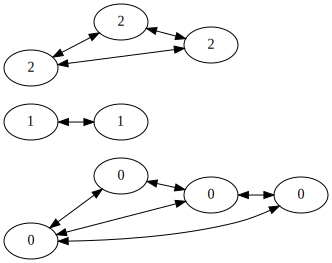

In [11]:
# Exercise X: connected_components.c  CC via iterative BFS

def BFS(graph, src_node):
    num_nodes = graph.nrows
    w = grb.Vector.sparse(grb.BOOL, num_nodes) #wavefront
    v = grb.Vector.sparse(grb.BOOL, num_nodes) #visited
    w[src_node] = True
    
    it = 1
    with grb.BOOL.LOR_LAND:
        while w.nvals > 0:
            # Merge the wavefront into the visited list
            # TODO which is the idiom we want here?
            #v += w               # This uses LOR b/c LOR is default add for BOOL types
            #v = v + w
            #v.eadd(w, out=v, add_op=grb.BOOL.LOR)
            #v[w] = True
            v.assign_scalar(True, mask=w)
                        
            # Compute the next wavefront
            # w<!v, r> = graph.T @ w
            graph.mxv(w, mask=v, out=w, desc=grb.descriptor.RCT0)
            
            # Compute the next wavefront without using a transpose
            # w'<!v', r> = w' @ graph
            #w.vxm(graph, mask=v, out=w, desc=grb.descriptor.RC)
            
            it += 1
    
    return v

def connected_components(graph):
    num_nodes = graph.nrows
    cc_ids    = grb.Vector.sparse(grb.UINT64, num_nodes)
    num_ccs   = 0
    
    for src_node in range(num_nodes):
        if cc_ids.get(src_node) == None:
            print("Processing node", src_node)
            visited = BFS(graph, src_node) # traverse from src_node marking all reachable nodes
            
            #cc_ids[visited] = src_node
            cc_ids.assign_scalar(num_ccs, mask=visited)
            num_ccs += 1
            
    return num_ccs, cc_ids
            
NUM_NODES = 9
NUM_EDGES = 18
row_indices = [0, 0, 0, 1, 1, 2, 3, 3, 4, 4, 5, 5, 6, 7, 7, 8, 8, 8]
col_indices = [1, 4, 8, 0, 8, 6, 5, 7, 0, 8, 3, 7, 2, 3, 5, 0, 1, 4]
values      = [1, 2, 1, 1, 3, 4, 1, 2, 2, 5, 1, 2, 4, 2, 2, 1, 3, 5]
#graph = grb.Matrix.sparse(grb.types.BOOL, NUM_NODES, NUM_NODES)
graph = grb.Matrix.from_lists(row_indices, col_indices, values, NUM_NODES, NUM_NODES, grb.UINT64)
print(graph)
num_ccs, components = connected_components(graph)
print("\nFound", num_ccs, "components.")
print(components)
            
draw(graph, show_weight=False, label_vector=components)

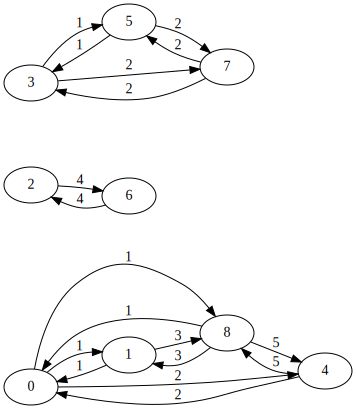

In [12]:
draw(graph)